In [95]:
from lammps import IPyLammps
L = IPyLammps()

LAMMPS output is captured by PyLammps wrapper


In [96]:
# import dump

LAMMPS output is captured by PyLammps wrapper


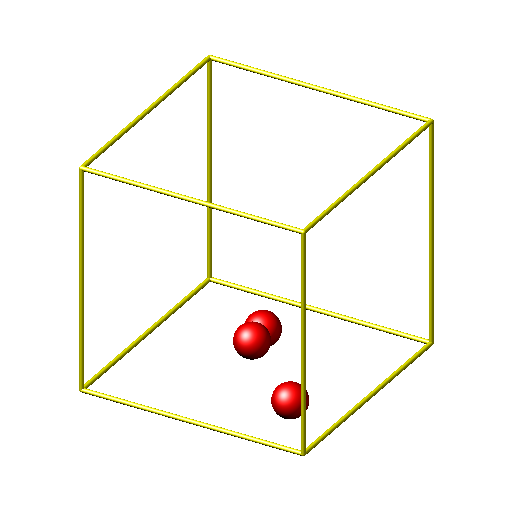

In [97]:
import numpy as np

L = IPyLammps()

L.units("lj")
L.atom_style("atomic")
L.atom_modify("map array")

L.lattice('fcc', 0.8442)
L.region('box', 'block', 0, 4, 0, 4, 0, 4)
L.create_box(1, 'box')
L.mass(1, 1.0)

n_atoms = 3
for _ in range(n_atoms):
    x = float(random.randrange(0, 400))/100
    y = float(random.randrange(0, 400))/100
    z = float(random.randrange(0, 400))/100
    L.create_atoms(1, 'single', x, y, z)

L.velocity("all", "create", 1.44, 87287, "loop geom")

L.pair_style("lj/cut", 2.5)
L.pair_coeff(1, 1, 1.0, 1.0, 2.5)

L.neighbor(0.3, "bin")
L.neigh_modify("delay", 0, "every", 20, "check no")

L.fix("1 all nve")

L.variable("fx atom fx")

L.info("all")

L.run(100)
L.image(zoom=1.0)

In [98]:
L.dump('myDump', 'all', 'atom', 10, 'dump.atom')
L.run(100)

['Setting up Verlet run ...',
 '  Unit style    : lj',
 '  Current step  : 100',
 '  Time step     : 0.005',
 'Per MPI rank memory allocation (min/avg/max) = 3.564 | 3.564 | 3.564 Mbytes',
 'Step Temp E_pair E_mol TotEng Press ',
 '     100    1.4423304 -0.0077887816            0    1.4345416 0.0093594221 ',
 '     200    1.4399473            0            0    1.4399473 0.0094969027 ',
 'Loop time of 0.00064683 on 1 procs for 100 steps with 3 atoms',
 '',
 'Performance: 66787295.540 tau/day, 154600.221 timesteps/s',
 '69.0% CPU use with 1 MPI tasks x no OpenMP threads',
 '',
 'MPI task timing breakdown:',
 'Section |  min time  |  avg time  |  max time  |%varavg| %total',
 '---------------------------------------------------------------',
 'Pair    | 2.5034e-05 | 2.5034e-05 | 2.5034e-05 |   0.0 |  3.87',
 'Neigh   | 1.9789e-05 | 1.9789e-05 | 1.9789e-05 |   0.0 |  3.06',
 'Comm    | 8.3447e-05 | 8.3447e-05 | 8.3447e-05 |   0.0 | 12.90',
 'Output  | 0.00043225 | 0.00043225 | 0.00043225 |

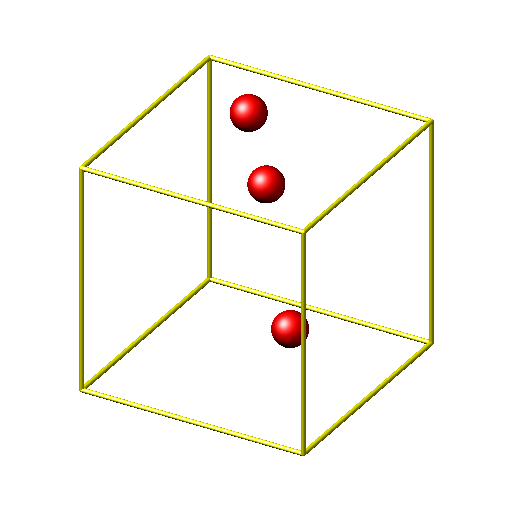

In [99]:
L.image(zoom=1.0)

In [168]:
def extract_trajectory(atom):
    atom_traj = list()
    with open('dump.atom') as fn:
        for line in fn.read().split('\n')[11-atom::12]:
            atom_traj.append(line)
    df = pd.DataFrame(atom_traj)
    df['x'+str(atom+1)] = df[0].apply(lambda x: x.split()[2])
    df['y'+str(atom+1)] = df[0].apply(lambda x: x.split()[3])
    df['z'+str(atom+1)] = df[0].apply(lambda x: x.split()[4])
    df.drop(columns=[0], inplace=True)
    return df

def extract_timestep():
    ts = list()
    with open('dump.atom') as fn:
        for line in fn.read().split('\n')[1::12]:
            ts.append(int(line) - 100)
    return pd.Series(ts)

trajectory = pd.concat([extract_trajectory(atom) for atom in range(n_atoms)], axis=1).reset_index(drop=True)
trajectory['timestep'] = extract_timestep()
trajectory

,x1,y1,z1,x2,y2,z2,x3,y3,z3,timestep
0,0.810726,0.659663,0.317857,0.676685,0.754317,0.00826376,0.24009,0.37852,0.00387972,0
1,0.807016,0.674657,0.325578,0.682135,0.746721,0.00615402,0.238349,0.371122,-0.00173231,10
2,0.803299,0.689655,0.33328,0.687593,0.73912,0.00406425,0.236608,0.363724,0.992656,20
3,0.799575,0.704657,0.340962,0.693059,0.731516,0.00199418,0.234867,0.356327,0.987044,30
4,0.795845,0.71966,0.348626,0.69853,0.723911,0.999943,0.233126,0.348929,0.981432,40
5,0.79211,0.734663,0.356272,0.704006,0.716306,0.997908,0.231385,0.341531,0.97582,50
6,0.788372,0.749666,0.363907,0.709484,0.708701,0.995885,0.229644,0.334133,0.970208,60
7,0.784634,0.764669,0.371541,0.714963,0.701096,0.993864,0.227903,0.326735,0.964596,70
8,0.780896,0.779672,0.379175,0.720442,0.693491,0.991842,0.226162,0.319337,0.958983,80
9,0.777158,0.794675,0.386808,0.725921,0.685886,0.98982,0.224421,0.311939,0.953371,90
